# 03_exploratory_data_analysis.ipynb

**Project:** king_county_housing_data  
**Author:** Johannes Gooth  
**Date:** April 12, 2024

---

## Introduction

In this notebook, we will focus on the Exploratory Data Analysis (EDA) phase of our project. After successfully cleaning and preprocessing the dataset, our primary objective here is to explore the data in depth, uncover patterns, and gain insights that will inform our further analysis.

The dataset under examination is the King County Housing Data, which provides comprehensive details about home sales in King County, USA. This dataset has been meticulously prepared in the previous steps, ensuring that it is clean and well-structured. Now, we will delve into the data to identify trends, relationships, and potential outliers that could impact the conclusions we draw.

### Key Steps:
1. **Descriptive Statistics:** We will begin by generating summary statistics to understand the central tendencies, dispersion, and overall structure of the data.
   
2. **Univariate Analysis:** This step involves examining individual variables to identify their distributions, ranges, and potential anomalies.

3. **Bivariate Analysis:** We will analyze relationships between variables to uncover correlations and interactions that may be important for our analysis.
   
4. **Visualizations:** We will use various graphical representations to better understand the data, including histograms, box plots,and heatmaps.

### Expected Outcome:
A thorough understanding of the dataset, with key insights identified that will inform the next steps in the analysis and ultimately support decision-making.

## Setting-Up the Working Enviroment

In [42]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from geopy.distance import geodesic
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from urllib.request import urlopen
import json


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading the Data

In [43]:
# Filepath of the CSV
file_path_csv = '../data/king_county_housing_data_cleaned_and_preprocessed.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path_csv)

In [44]:
# Filepath of the condition order JSON file
json_path_condition = '../data/condition_order.json'

# Load the saved category order from the JSON file
with open(json_path_condition, 'r') as f:
    grade_order = json.load(f)

# Reapply the order to the 'grade_label' feature
df['condition_label'] = pd.Categorical(df['condition_label'], categories=grade_order, ordered=True)

In [45]:
# Filepath of the condition order JSON file
json_path_grade = '../data/grade_order.json'

# Load the saved category order from the JSON file
with open(json_path_grade, 'r') as f:
    grade_order = json.load(f)

# Reapply the order to the 'grade_label' feature
df['grade_label'] = pd.Categorical(df['grade_label'], categories=grade_order, ordered=True)

## Descriptive Statistics

Let's begin by examining the numerical variables and their descriptive statistics for all houses. This will provide us with an overview of the central tendencies, variability, and distribution of the data. Understanding these basic statistics is crucial for identifying patterns and potential issues within the dataset.

In [46]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,mile_dist_center,age_at_sale,yrs_since_renovation,price_per_sqft
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21357.000,21420.000,21420.000,21420.000,...,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,740.000,21420.000
mean,4580939869.158,3.374,2.118,2083.133,15128.038,1.496,0.235,3.411,7.663,1791.170,...,98077.874,47.560,-122.214,1988.384,12775.718,541861.428,11.481,43.232,18.258,264.709
std,2876761172.448,0.925,0.769,918.808,41530.797,0.540,0.766,0.650,1.172,828.693,...,53.477,0.139,0.141,685.537,27345.622,367556.938,6.625,29.390,15.591,109.906
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,1.000,3.000,370.000,...,98001.000,47.156,-122.519,399.000,651.000,78000.000,0.613,-1.000,-1.000,87.588
25%,2123537386.750,3.000,1.750,1430.000,5040.000,1.000,0.000,3.000,7.000,1200.000,...,98033.000,47.471,-122.328,1490.000,5100.000,324950.000,6.079,17.000,7.000,182.927
50%,3904921185.000,3.000,2.250,1920.000,7614.000,1.500,0.000,3.000,7.000,1560.000,...,98065.000,47.572,-122.230,1840.000,7620.000,450550.000,10.279,39.000,15.000,245.238
75%,7308900186.250,4.000,2.500,2550.000,10690.500,2.000,0.000,4.000,8.000,2220.000,...,98117.000,47.678,-122.125,2370.000,10086.250,645000.000,15.730,63.000,27.000,318.731
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,4.000,5.000,13.000,9410.000,...,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,48.042,115.000,80.000,810.139


## Visualizing the Distribution of Numeric Variables - Univariate Analysis
### Boxplots
To gain a deeper understanding of the spread and central tendencies of our numeric variables, we will create boxplots for several key features in the dataset. This will help us identify any outliers, the overall distribution, and any potential skewness in the data. The following code generates a series of boxplots for various attributes such as the number of bedrooms, bathrooms, living space, lot size, house prices, and distance to the center of Seattle.

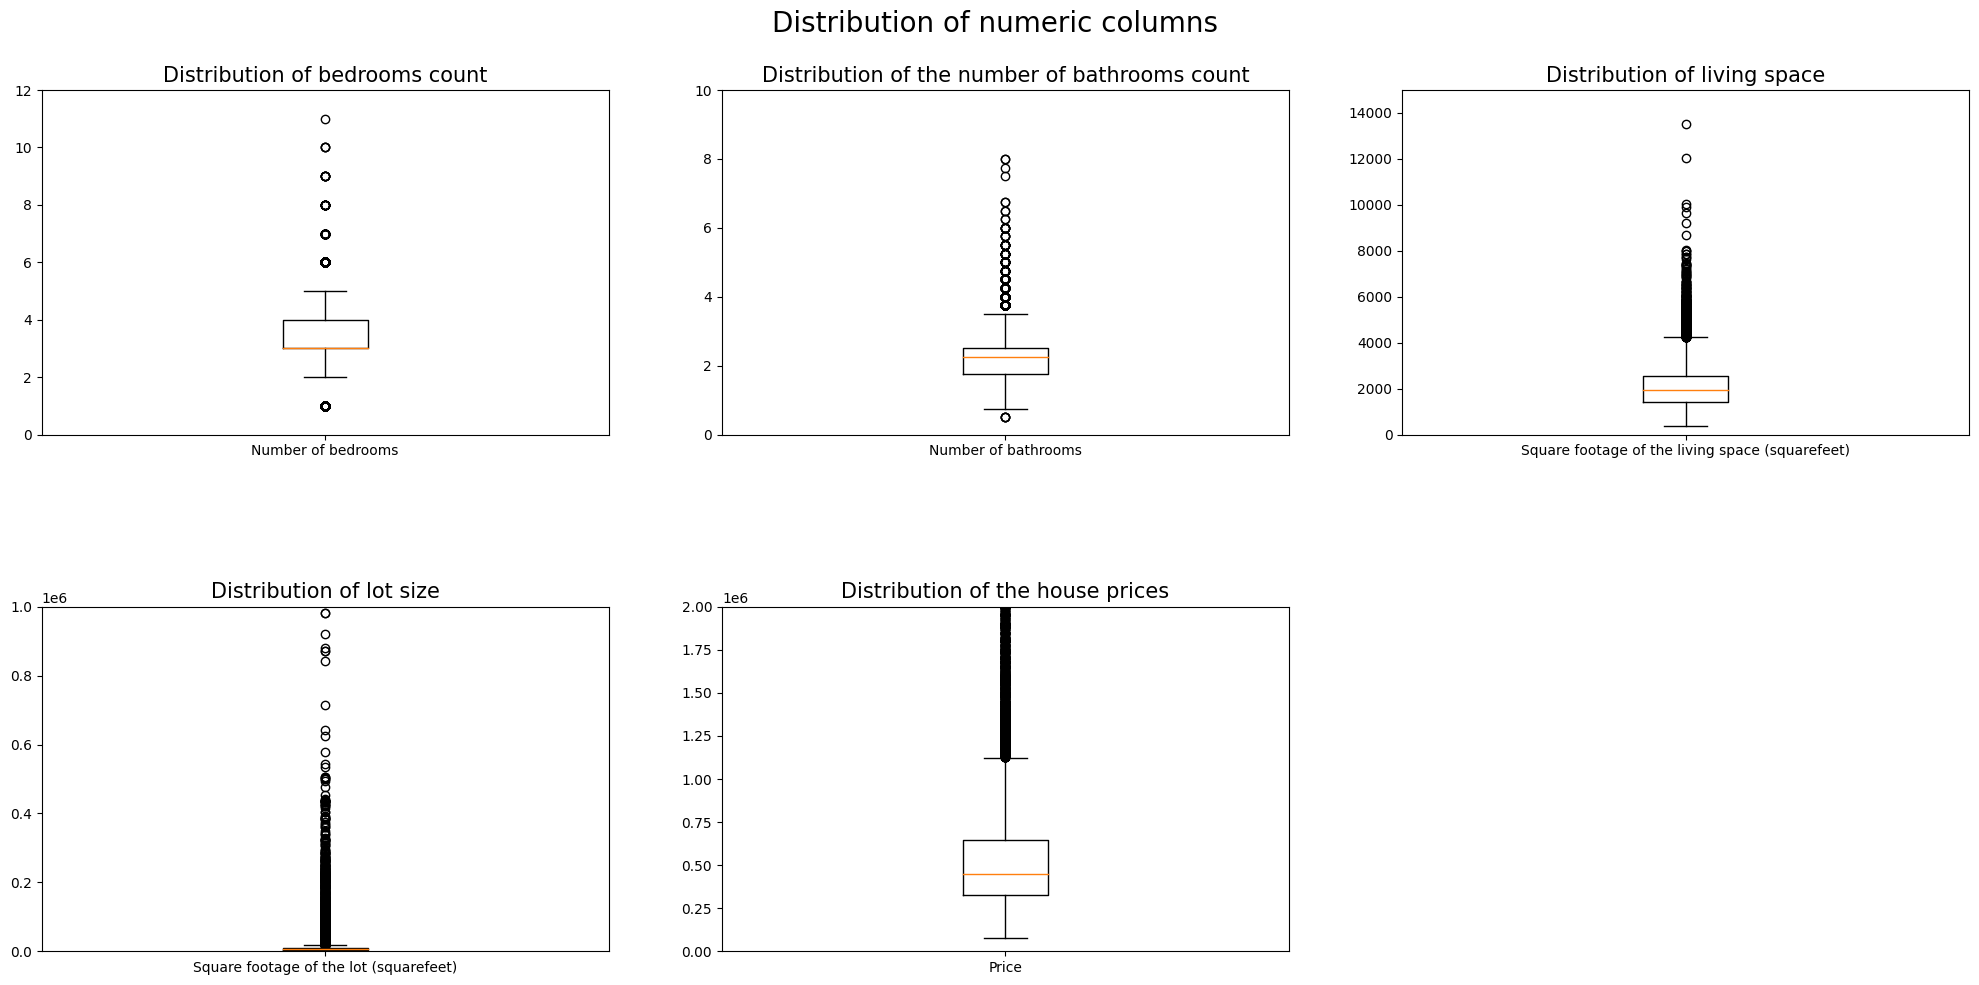

In [47]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df['bedrooms']) # creates boxplot
ax[0][0].set_xticklabels(labels=["Number of bedrooms"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,12) # limits the y-axis values from 0 to 12
ax[0][0].set_title("Distribution of bedrooms count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df['bathrooms'])
ax[0][1].set_xticklabels(labels=["Number of bathrooms"])
ax[0][1].set_ylim(0,10)
ax[0][1].set_title("Distribution of the number of bathrooms count", fontsize = 15);

ax[0][2].boxplot(x = df['sqft_living'])
ax[0][2].set_xticklabels(labels=["Square footage of the living space (squarefeet)"])
ax[0][2].set_ylim(0,15000)
ax[0][2].set_title("Distribution of living space", fontsize = 15);

ax[1][0].boxplot(x = df['sqft_lot'])
ax[1][0].set_xticklabels(labels=["Square footage of the lot (squarefeet)"])
ax[1][0].set_ylim(0,1000000)
ax[1][0].set_title("Distribution of lot size", fontsize = 15);
                              
ax[1][1].boxplot(x = df['price'])
ax[1][1].set_xticklabels(labels=["Price"])
ax[1][1].set_ylim(0,2000000)
ax[1][1].set_title("Distribution of the house prices", fontsize = 15);

ax[1][2].boxplot(x = df['mile_dist_center'])
ax[1][2].set_xticklabels(labels=["Distance to the center of Seattle (miles)"])
ax[1][2].set_ylim(0,60)
ax[1][2].set_title("Distribution of the distances to the center of Seattle", fontsize = 15);

fig.delaxes(ax[1][2]);

To perform the analysis based on the provided code and discuss the results, let’s break down each boxplot and interpret the insights.

#### 1. **Number of Bedrooms**
   - **Interpretation:** The boxplot for the number of bedrooms shows that most houses have between 3 and 5 bedrooms, which is the typical range for residential properties. The distribution appears to be slightly right-skewed, with a few outliers indicating properties with more than 8 bedrooms. These outliers might represent larger, more luxurious homes.
   - **Insight:** The concentration of data suggests that houses with 3-5 bedrooms are the most common, possibly indicating the typical family size and housing demand in the area.

#### 2. **Number of Bathrooms**
   - **Interpretation:** The distribution of bathrooms shows a similar pattern, with most houses having 2 to 3 bathrooms. The plot is right-skewed, with fewer properties having more than 4 bathrooms. There are outliers for houses with up to 7 bathrooms.
   - **Insight:** This distribution likely correlates with the number of bedrooms, as larger homes with more bedrooms typically have more bathrooms. The outliers might represent luxury properties with multiple bathrooms.

#### 3. **Square Footage of Living Space**
   - **Interpretation:** The living space (square footage) boxplot shows a wide range, with most properties falling between 1,000 and 3,000 square feet. The right tail suggests a small number of significantly larger homes, up to 10,000 square feet.
   - **Insight:** This wide range indicates a diverse housing market, with both average-sized family homes and much larger, high-end properties.

#### 4. **Square Footage of the Lot**
   - **Interpretation:** The lot size distribution is highly right-skewed, with most properties having a lot size under 15,000 square feet. There are significant outliers with lot sizes extending to nearly 1,000,000 square feet, which could represent rural or semi-rural properties with extensive land.
   - **Insight:** The sharp skewness suggests that while most properties have relatively modest lot sizes, there are a few properties with extensive land, potentially affecting property value and use.

#### 5. **Price**
   - **Interpretation:** The house prices show a right-skewed distribution, with most homes priced under $1 million, but with a significant number of outliers reaching up to $2 million or more.
   - **Insight:** The right skewness and presence of outliers indicate a market where high-end properties significantly drive the upper end of the price distribution. This may reflect a mix of typical family homes and luxury real estate in the dataset.

#### 6. **Distance to the Center of Seattle**
   - **Interpretation:** The distribution of distances from the center of Seattle shows that most properties are within 10-20 miles of the city center, with a few outliers located up to 60 miles away.
   - **Insight:** The majority of homes being relatively close to the city center suggests that proximity to urban amenities is a key factor in the housing market. The outliers represent more rural properties that might be more affordable but farther from urban conveniences.

#### Discussion

The boxplots provide a clear visualization of the distribution and variability within key numerical features of the dataset. Several patterns emerge:

- **Central Tendencies:** Most properties are within the expected ranges for bedrooms, bathrooms, living space, and lot size, which aligns with typical residential real estate.
- **Skewness and Outliers:** The right-skewed distributions in living space, lot size, and price suggest that while most properties are average in size and value, there is a significant presence of larger, more expensive properties. These outliers are crucial to understanding the upper segment of the market.
- **Proximity to Seattle:** The distance data indicates that most properties are relatively close to the city, with a few outliers that are much farther away. This could reflect a divide between urban and rural properties, with different market dynamics at play.

These insights set the stage for more detailed analysis, including correlations between these variables and their impact on property prices. Understanding these distributions is essential for refining the analysis and identifying key trends in the King County housing market.

### Histograms
To better understand the distribution of key numeric variables in our dataset, we will create a series of histograms. These histograms will allow us to observe the frequency of different values within each variable, providing insights into their distribution patterns, potential outliers, and the overall spread of the data. The following code generates histograms for various attributes, including the number of bedrooms, bathrooms, living space, lot size, house prices, and the age of the houses at the time of sale.

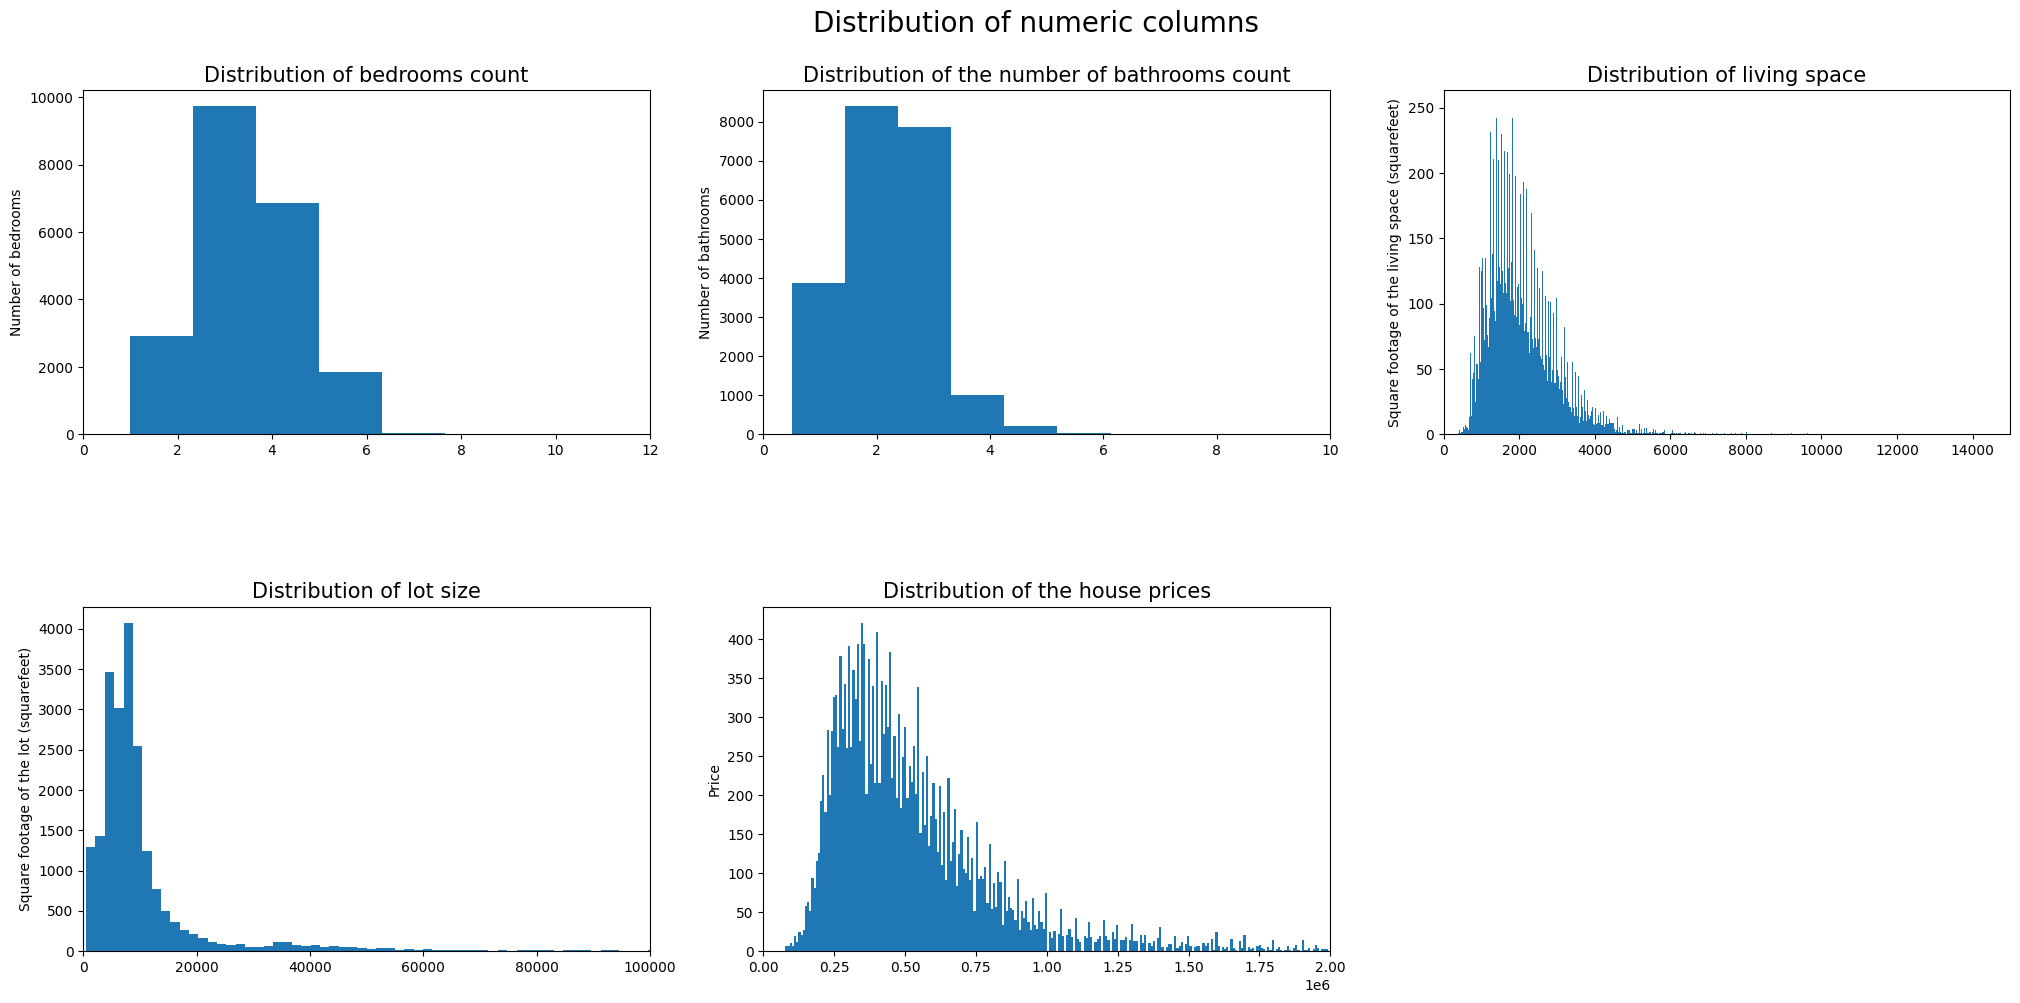

In [48]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x = df['bedrooms'], bins = 24) # creates histogram 
ax[0][0].set_ylabel("Number of bedrooms", fontsize = 10) # sets the label for the ticks on the x-axis
ax[0][0].set_xlim(0,12) # limits the y-axis values from 0 to 12
ax[0][0].set_title("Distribution of bedrooms count", fontsize = 15); # sets title for subplot

ax[0][1].hist(x = df['bathrooms'], bins = 8)
ax[0][1].set_ylabel("Number of bathrooms", fontsize = 10)
ax[0][1].set_xlim(0,10)
ax[0][1].set_title("Distribution of the number of bathrooms count", fontsize = 15);

ax[0][2].hist(x = df['sqft_living'], bins = 1000)
ax[0][2].set_ylabel("Square footage of the living space (squarefeet)", fontsize = 10)
ax[0][2].set_xlim(0,15000)
ax[0][2].set_title("Distribution of living space", fontsize = 15);

ax[1][0].hist(x = df['sqft_lot'], bins = 1000)
ax[1][0].set_ylabel("Square footage of the lot (squarefeet)", fontsize = 10)
ax[1][0].set_xlim(0,100000)
ax[1][0].set_title("Distribution of lot size", fontsize = 15);
                              
ax[1][1].hist(x = df['price'], bins = 1000)
ax[1][1].set_ylabel("Price", fontsize = 10)
ax[1][1].set_xlim(0,2000000)
ax[1][1].set_title("Distribution of the house prices", fontsize = 15);

ax[1][2].hist(x = df['age_at_sale'], bins = 50)
ax[1][2].set_ylabel("Age of the houses", fontsize = 10)
ax[1][2].set_xlim(0,150)
ax[1][2].set_title("Distribution of the age of the houses", fontsize = 15);

fig.delaxes(ax[1][2]);

Here’s an analysis and discussion of the histograms for each numerical features:

#### 1. **Number of Bedrooms**
   - **Interpretation:** The histogram for the number of bedrooms shows that the majority of houses have between 3 and 4 bedrooms, which aligns with typical residential properties. The distribution is slightly right-skewed, with fewer properties having more than 5 bedrooms. The binning reveals that while 2-bedroom houses are common, there are significantly fewer houses with 1 bedroom, indicating that larger homes are more typical in this dataset.
   - **Insight:** This distribution suggests that the housing market in this area primarily caters to families, as evidenced by the prevalence of 3-4 bedroom homes.

#### 2. **Number of Bathrooms**
   - **Interpretation:** The histogram for the number of bathrooms indicates that most homes have between 2 and 3 bathrooms. The right skewness is more pronounced here, with a small number of homes featuring 4 or more bathrooms. The data suggests that it is uncommon for houses to have fewer than 2 bathrooms.
   - **Insight:** Similar to the bedroom distribution, the number of bathrooms aligns with the number of bedrooms, reflecting a typical residential pattern. Homes with more bathrooms are likely larger, more luxurious properties.

#### 3. **Square Footage of Living Space**
   - **Interpretation:** The histogram for square footage of living space displays a wide range, with most properties clustering around 1,000 to 2,500 square feet. The distribution has a long right tail, with some houses having much larger living spaces, up to 15,000 square feet. This suggests that while average-sized homes are most common, there are also several very large properties.
   - **Insight:** The broad range in living space indicates a diverse housing market that includes both standard family homes and more expansive properties, possibly reflecting a range of property values and target buyers.

#### 4. **Square Footage of the Lot**
   - **Interpretation:** The lot size distribution is heavily right-skewed, with most properties having lot sizes below 10,000 square feet. There are, however, significant outliers with much larger lots extending up to 100,000 square feet. These larger lots likely represent rural properties or estates with extensive land.
   - **Insight:** The sharp skewness and large outliers indicate a mix of typical suburban lots and much larger rural properties, highlighting the diversity in land use and property types within the dataset.

#### 5. **Price**
   - **Interpretation:** The histogram for house prices reveals that most homes are priced under $1 million, with a steep decline in frequency as prices increase. The right skewness suggests the presence of a luxury market segment with houses priced significantly higher, up to $2 million or more.
   - **Insight:** The distribution indicates a typical housing market where most properties are within an affordable range for middle-class buyers, but with a small segment of high-end luxury homes that significantly drive up the maximum prices.

#### 6. **Age of the Houses**
   - **Interpretation:** The age distribution of houses at the time of sale is fairly uniform, with a slight concentration of homes around 30-50 years old. The histogram shows that houses of all ages are represented, from newly built to over 100 years old.
   - **Insight:** This uniform distribution suggests that the housing market includes both newer developments and older, established properties, offering a wide range of options for buyers interested in either modern or historic homes.

### Discussion

The histograms provide a detailed look at the frequency and distribution of key numerical features within the dataset. Several important patterns emerge:

- **Common Residential Features:** The concentration of homes with 3-4 bedrooms and 2-3 bathrooms suggests that the market is primarily composed of family-sized houses, reflecting typical residential needs.
- **Diversity in Property Sizes and Prices:** The wide range in square footage of living space, lot size, and house prices highlights the diversity within the housing market. There are both average-sized homes and much larger, high-end properties, catering to different segments of buyers.
- **Skewness and Outliers:** The right-skewed distributions in living space, lot size, and price suggest that while most properties are within typical ranges, there are significant outliers that represent the upper echelon of the market. These outliers are critical for understanding the full scope of the real estate market in King County.

These insights provide a solid foundation for further analysis, including examining correlations between these variables and understanding their impact on housing prices and market trends. The histograms are crucial for identifying underlying patterns that might influence strategic decisions in real estate investment and development.

## Relationships in the Data - Bivariate Analysis

To explore the relationships between different numerical variables in our dataset, we will create a correlation matrix. This matrix quantifies the strength and direction of linear relationships between pairs of variables. Visualizing this correlation matrix with a heatmap allows us to quickly identify strong correlations, both positive and negative, which can provide insights into how different features interact with each other.

The heatmap will help us understand which variables might be influencing each other and could be particularly useful for identifying multicollinearity or potential predictors for further analysis.

### Relationships for All Houses
In this part, we will explore the relationships between the numerical variables across all houses in the dataset. This analysis will help us understand how different features interact with each other and potentially influence the outcomes we're interested in.

In [49]:
# correlation matrix between these variables
corr_columns=['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
              'sqft_lot', 'yr_built', 'mile_dist_center', 'age_at_sale',
              'view', 'grade', 'condition','price_per_sqft'
              ]
corr_mtrx = df[corr_columns].corr()

# Display the correlation matrix
corr_mtrx

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,mile_dist_center,age_at_sale,view,grade,condition,price_per_sqft
price,1.000,0.310,0.525,0.255,0.701,0.089,0.051,-0.287,-0.051,0.395,0.667,0.034,0.554
bedrooms,0.310,1.000,0.515,0.178,0.579,0.032,0.155,0.058,-0.155,0.079,0.358,0.026,-0.207
bathrooms,0.525,0.515,1.000,0.502,0.756,0.088,0.506,0.083,-0.507,0.185,0.666,-0.129,-0.094
floors,0.255,0.178,0.502,1.000,0.353,-0.006,0.489,0.003,-0.489,0.027,0.458,-0.267,0.002
sqft_living,0.701,0.579,0.756,0.353,1.000,0.173,0.317,0.074,-0.317,0.282,0.762,-0.062,-0.095
sqft_lot,0.089,0.032,0.088,-0.006,0.173,1.000,0.052,0.243,-0.052,0.076,0.114,-0.009,-0.036
yr_built,0.051,0.155,0.506,0.489,0.317,0.052,1.000,0.388,-1.000,-0.056,0.446,-0.365,-0.295
mile_dist_center,-0.287,0.058,0.083,0.003,0.074,0.243,0.388,1.000,-0.388,-0.075,0.005,-0.074,-0.551
age_at_sale,-0.051,-0.155,-0.507,-0.489,-0.317,-0.052,-1.000,-0.388,1.000,0.056,-0.447,0.364,0.295
view,0.395,0.079,0.185,0.027,0.282,0.076,-0.056,-0.075,0.056,1.000,0.248,0.045,0.221


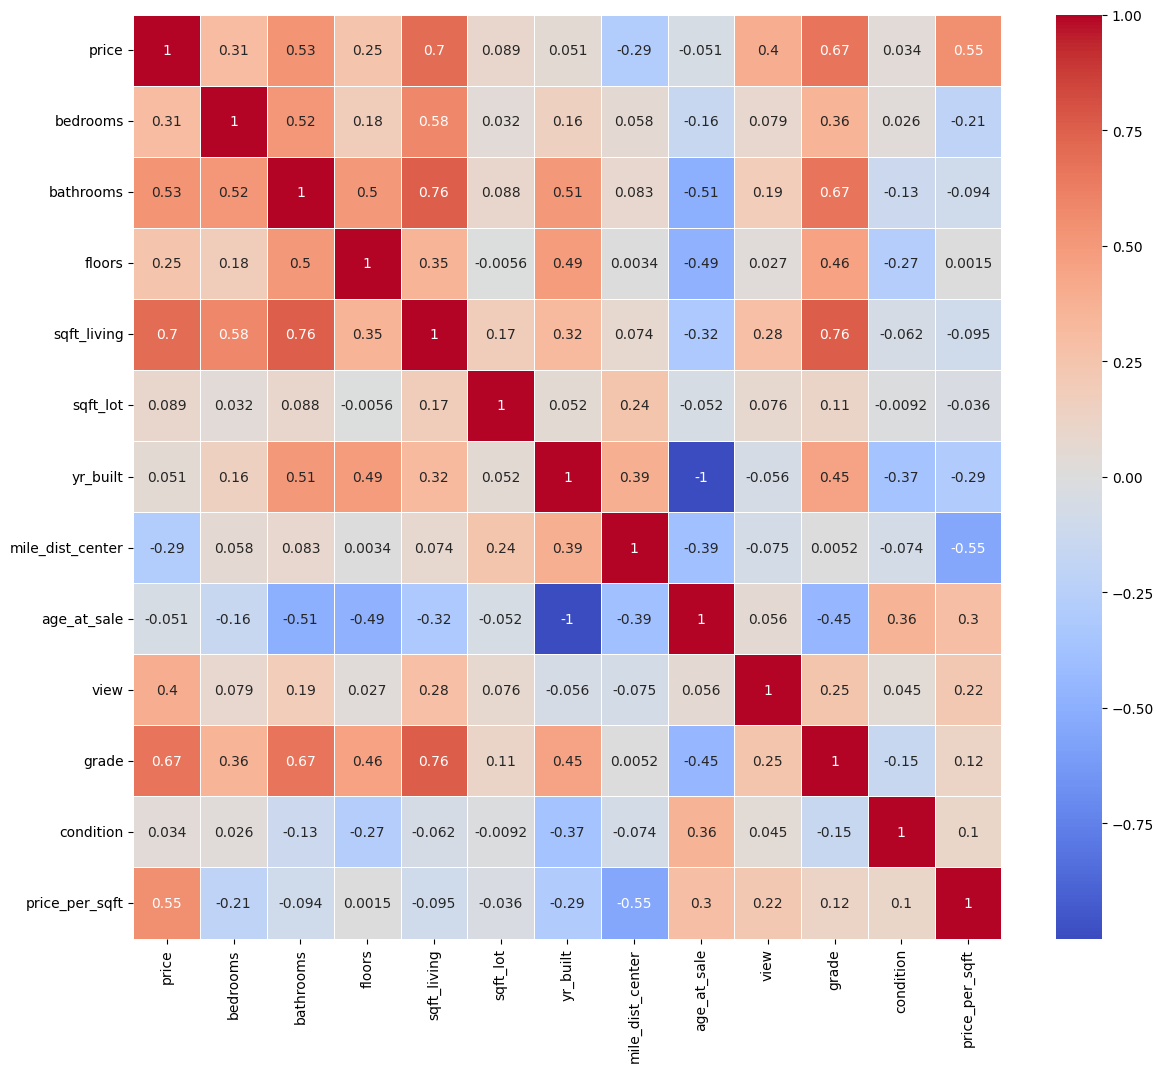

In [50]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

A correlation matrix is a powerful tool that quantifies the strength and direction of linear relationships between pairs of variables. The values in the matrix range from -1 to 1, where:

- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no linear correlation.

#### **Summary of Correlation Matrix Insights for All Houses**

The correlation matrix reveals several key relationships, both directly related to price and among other features in the dataset, providing a comprehensive view of the factors influencing the housing market in King County.

##### Price Relationships:
1. **Price vs. Square Footage of Living Space (0.701):**
   - **Insight:** Larger homes with more living space tend to command higher prices, reflecting the significant value placed on the size of the home.

2. **Price vs. Grade (0.667):**
   - **Insight:** Higher-grade homes, which typically indicate better quality and design, are strongly associated with higher prices. This suggests that grade is a major determinant of property value.

3. **Price vs. Bathrooms (0.525):**
   - **Insight:** The number of bathrooms is moderately correlated with price, indicating that homes with more bathrooms tend to be more expensive, likely due to the increased comfort and luxury they offer.

4. **Price vs. View (0.395):**
   - **Insight:** A good view contributes positively to a home’s value, with properties offering better views generally being priced higher.

5. **Price vs. Distance from City Center (-0.287):**
   - **Insight:** Homes closer to the city center tend to be more expensive, reflecting the premium placed on proximity to urban amenities and central locations.

6. **Price vs. Bedrooms (0.310):**
   - **Insight:** While the number of bedrooms does have a positive correlation with price, it is relatively weaker, suggesting that other factors like overall living space and grade are more influential.

7. **Price vs. Price per Square Foot (0.554):**
   - **Insight:** More expensive properties tend to have a higher price per square foot, indicating that premium locations and high-quality features contribute to higher values per unit of space.

8. **Price and Condition**
   - **Insight:** The very weak correlation of 0.034 between price and condition suggests that the condition of a home has little to no direct impact on its price in this dataset. This may indicate that other factors, such as location, size, or grade, play a much more significant role in determining a home's value, while the condition may be perceived as less critical or already accounted for in the overall grade.

9. **Price and Years Old at Time of Sale**
   - **Insight:** The very weak correlations between price and the years old at the time of sale (-0.051) indicate that the age of the property at the time of sale has no significant impact on its price. This negligible correlation suggest that other factors, such as location, size, and property features, play a much more critical role in determining property value, with the age of the home contributing little to the overall price.

10. **Price and Year Built**
   - **Insight:** The correlation of 0.051 between price and the year a home was built indicates a very weak positive relationship. This suggests that the age of the property has little impact on its price in this dataset. Again, other factors such as location, size, and property grade are likely more significant determinants of value, with the year of construction contributing minimally to the overall price.

11. **Price and Square Footage of Lot**
   - **Insight:** The correlation of 0.089 between price and the square footage of the lot indicates a very weak positive relationship. This suggests that the size of the lot has minimal influence on the price of a property in this dataset. Factors such as location, living space, or property grade likely play a more significant role in determining value, with lot size contributing relatively little to the overall price.

12. **Price and Number of Floors**
   - **Insight:** The correlation of 0.25 between price and the number of floors indicates a weak positive relationship, suggesting that homes with more floors tend to be slightly more expensive. This modest correlation implies that while the number of floors may contribute to a property's value, it is not a major determinant of price compared to other factors such as size, location, or overall quality.

##### Other Key Relationships:
1. **Bathrooms vs. Square Footage of Living Space (0.756):**
   - **Insight:** Larger homes typically have more bathrooms, indicating that the number of bathrooms scales with the size of the property.

2. **Grade vs. Square Footage of Living Space (0.762):**
   - **Insight:** Higher-grade homes are generally larger, suggesting that grade captures both the quality and the size of the home.

3. **Bedrooms vs. Bathrooms (0.515):**
   - **Insight:** Homes with more bedrooms tend to have more bathrooms, reflecting a typical layout in family-oriented houses.

4. **Bathrooms vs. Year Built (0.506):**
   - **Insight:** Newer homes tend to have more bathrooms, aligning with modern housing trends that favor greater convenience and luxury.

5. **Number of Floors vs. Year Built (0.489):**
   - **Insight:** Newer homes are more likely to have multiple stories, likely due to the trend of maximizing living space on smaller plots in urban developments.

6. **Distance from City Center vs. Price per Square Foot (-0.551):**
   - **Insight:** Properties closer to the city center have a higher price per square foot, underscoring the value of urban proximity.

7. **Year Built vs. Distance from City Center (0.388):**
   - **Insight:** Newer homes are more likely to be located further from the city center, reflecting the outward expansion of urban development.

##### Conclusion

The correlation matrix provides valuable insights into the King County housing market. Key price-related correlations highlight the importance of living space, grade, and location (proximity to the city center) as primary drivers of property value. Additionally, the matrix reveals significant relationships between other features, such as the number of bathrooms, grade, and the year built, which are crucial for understanding how different aspects of a property contribute to its overall value and appeal.

These insights offer a robust foundation for further analysis and strategic decision-making in real estate development, investment, and pricing strategies. Understanding these correlations can help identify which property features are most likely to influence market value and buyer preferences.

### Relationships for the City Houses
In this section, we will focus exclusively on the relationships between numerical variables for houses located within the city of Seattle. By isolating city houses, this analysis aims to uncover how different features interact within an urban context and how these interactions might influence key outcomes, such as pricing or demand. Understanding these relationships in the city-specific subset of the dataset will provide more targeted insights that are relevant to urban real estate dynamics.

In [51]:
# Filter the DataFrame to include only city houses
city_houses = df[df['location_type'] == 'city']

# Select the relevant columns for the correlation matrix
corr_columns = [
    'price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
    'sqft_lot', 'yr_built', 'mile_dist_center', 'age_at_sale',
    'view', 'grade', 'condition', 'price_per_sqft'
]

# Ensure 'date' column is handled correctly if it's a datetime type:
# Convert 'date' to a numerical value if necessary, e.g., the year of the date
if 'date' in corr_columns and pd.api.types.is_datetime64_any_dtype(city_houses['date']):
    city_houses['date'] = city_houses['date'].dt.year

# Compute the correlation matrix
corr_mtrx_city = city_houses[corr_columns].corr()

# Display the correlation matrix
corr_mtrx_city

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,mile_dist_center,age_at_sale,view,grade,condition,price_per_sqft
price,1.000,0.333,0.508,0.237,0.747,0.239,-0.067,-0.271,0.068,0.414,0.693,0.170,0.469
bedrooms,0.333,1.000,0.480,0.116,0.591,0.165,-0.009,0.005,0.009,0.116,0.299,0.106,-0.241
bathrooms,0.508,0.480,1.000,0.479,0.684,0.017,0.396,-0.138,-0.396,0.217,0.615,0.011,-0.120
floors,0.237,0.116,0.479,1.000,0.223,-0.302,0.508,-0.247,-0.509,0.030,0.479,-0.179,0.037
sqft_living,0.747,0.591,0.684,0.223,1.000,0.318,0.051,-0.066,-0.051,0.364,0.660,0.139,-0.150
sqft_lot,0.239,0.165,0.017,-0.302,0.318,1.000,-0.185,0.390,0.185,0.282,0.089,0.083,-0.079
yr_built,-0.067,-0.009,0.396,0.508,0.051,-0.185,1.000,0.084,-1.000,-0.023,0.348,-0.355,-0.201
mile_dist_center,-0.271,0.005,-0.138,-0.247,-0.066,0.390,0.084,1.000,-0.084,0.008,-0.191,0.007,-0.358
age_at_sale,0.068,0.009,-0.396,-0.509,-0.051,0.185,-1.000,-0.084,1.000,0.023,-0.349,0.354,0.202
view,0.414,0.116,0.217,0.030,0.364,0.282,-0.023,0.008,0.023,1.000,0.328,0.044,0.151


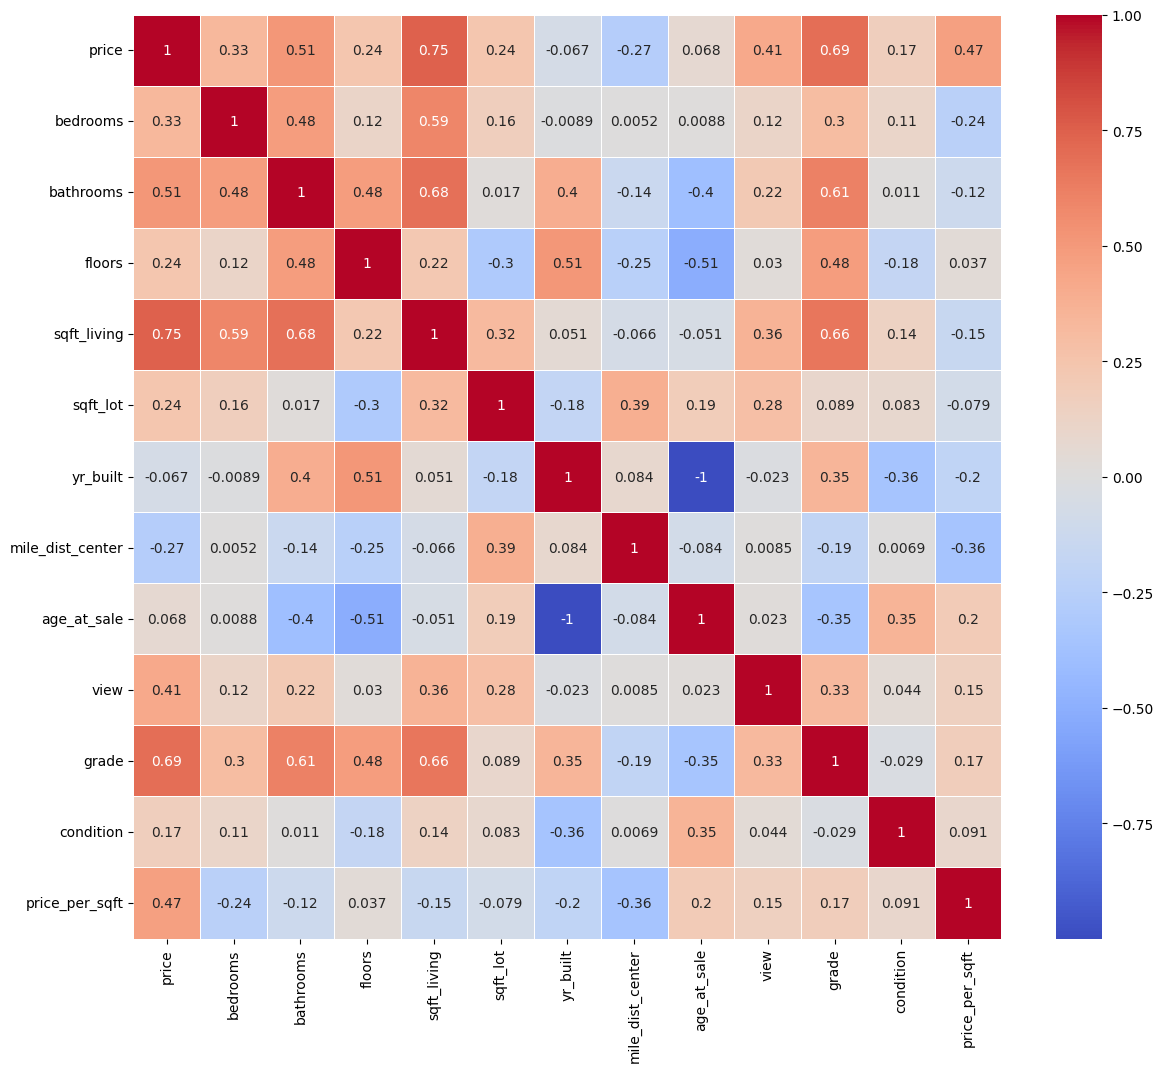

In [52]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx_city, linewidths=.5, annot=True, cmap='coolwarm')

#### **Correlation Matrix Analysis for City Houses**

This correlation matrix provides insights into how various features of city houses relate to each other and influence the overall price. Below are the key observations:

##### Price Relationships:
1. **Price vs. Square Footage of Living Space (0.747):**
    - **Insight:** The strong positive correlation indicates that larger homes with more living space tend to have higher prices. This is one of the strongest correlations, reflecting the significant role that living space plays in determining property value in urban areas.

2. **Price vs. Grade (0.693):**
    - **Insight:** The correlation between price and grade is also strong, suggesting that higher-grade properties, which likely have better construction quality and design, command higher prices. This is crucial in urban settings where quality and prestige significantly impact property value.

3. **Price vs. View (0.414):**
    - **Insight:** A moderate positive correlation indicates that properties with better views are valued higher. In urban areas, scenic views, particularly of landmarks or waterfronts, are premium features that can substantially increase property prices.

4. **Price vs. Bathrooms (0.508):**
    - **Insight:** The number of bathrooms shows a moderate positive correlation with price, indicating that more bathrooms generally add to the value of a home. This aligns with urban buyers' preference for convenience and luxury.

5. **Price vs. Bedrooms (0.333):**
    - **Insight:** The weaker correlation between price and the number of bedrooms suggests that while more bedrooms can increase a property's value, they are less influential than living space or grade. This could indicate that urban buyers prioritize overall space and quality over the number of rooms.

6. **Price vs. Distance from City Center (-0.271):**
    - **Insight:** The negative correlation suggests that homes closer to the city center tend to be more expensive, reflecting the premium on urban proximity. Although not very strong, this relationship highlights the value placed on being near city amenities.

7. **Price vs. Price per Square Foot (0.469):**
    - **Insight:** The moderate positive correlation between price and price per square foot suggests that as the overall price increases, the price per square foot also rises, likely due to higher demand for quality or location.

##### Other Key Relationships:
1. **Bathrooms vs. Square Footage of Living Space (0.684):**
    - **Insight:** The strong positive correlation indicates that larger homes typically have more bathrooms, which is expected in urban homes designed for greater comfort and luxury.

2. **Bedrooms vs. Square Footage of Living Space (0.591):**
    - **Insight:** This correlation suggests that homes with more bedrooms tend to be larger, although this relationship is weaker than that of bathrooms, possibly due to variations in room sizes and layouts.

3. **Grade vs. Square Footage of Living Space (0.660):**
    - **Insight:** The strong correlation between grade and square footage of living space indicates that higher-grade homes are often larger. This reinforces the idea that more prestigious homes not only have better construction but are also more spacious.

4. **Bathrooms vs. Year Built (0.396):**
    - **Insight:** Newer homes in the city tend to have more bathrooms, reflecting modern housing trends that emphasize comfort and convenience.

5. **Year Built vs. Number of Floors (0.508):**
    - **Insight:** The positive correlation suggests that newer homes are more likely to have multiple floors, a design choice that maximizes living space in dense urban environments.

6. **Distance from City Center vs. Square Footage of Lot (0.390):**
    - **Insight:** The positive correlation indicates that as the distance from the city center increases, so does the lot size, reflecting the availability of larger plots in less densely populated areas.

7. **Age at Sale vs. Number of Floors (-0.509):**
    - **Insight:** Older homes tend to have fewer floors, likely reflecting historical building styles that favored single-story designs.

8. **Condition vs. Year Built (-0.355):**
    - **Insight:** The negative correlation suggests that older homes tend to be in poorer condition, as expected due to wear and tear over time.

9. **Price per Square Foot vs. Distance from City Center (-0.358):**
    - **Insight:** The negative correlation between price per square foot and distance from the city center indicates that properties closer to the city center are valued more per square foot, reflecting the premium on central urban locations.

#### Conclusion

The correlation matrix for city houses provides a clear view of how different factors interact to influence property prices in an urban context. Key factors such as living space, grade, and view have strong positive correlations with price, highlighting their importance in determining property value. The analysis also reveals how urban proximity impacts price per square foot, with properties closer to the city center commanding higher values. Understanding these relationships is crucial for making informed decisions in urban real estate markets, where space, quality, and location are the primary drivers of value.

### Relationships for the Countryside Houses

In this section, we will examine the relationships between numerical variables specifically for houses located in the countryside around Seattle. By focusing on countryside properties, this analysis will help us understand how different features interact in a rural context and how these interactions might affect outcomes like property value and desirability. Gaining insights into these relationships for countryside houses will allow us to compare and contrast them with urban properties, providing a more comprehensive understanding of the regional real estate market.

In [53]:
# Filter the DataFrame to include only countryside houses
countryside_houses = df[df['location_type'] == 'countryside']

# Select the relevant columns for the correlation matrix
corr_columns = [
    'price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
    'sqft_lot', 'yr_built', 'mile_dist_center', 'age_at_sale',
    'view', 'grade', 'condition', 'price_per_sqft'
]

# Ensure 'date' column is handled correctly if it's a datetime type:
# Convert 'date' to a numerical value if necessary, e.g., the year of the date
if 'date' in corr_columns and pd.api.types.is_datetime64_any_dtype(countryside_houses['date']):
    countryside_houses['date'] = countryside_houses['date'].dt.year

# Compute the correlation matrix
corr_mtrx_countryside = countryside_houses[corr_columns].corr()

# Display the correlation matrix
corr_mtrx_countryside

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,mile_dist_center,age_at_sale,view,grade,condition,price_per_sqft
price,1.000,0.327,0.570,0.269,0.729,0.112,0.208,-0.373,-0.208,0.385,0.686,-0.046,0.652
bedrooms,0.327,1.000,0.517,0.241,0.564,-0.005,0.202,-0.121,-0.202,0.072,0.374,-0.024,-0.081
bathrooms,0.570,0.517,1.000,0.541,0.783,0.074,0.574,-0.052,-0.574,0.191,0.682,-0.214,0.046
floors,0.269,0.241,0.541,1.000,0.454,0.013,0.601,0.095,-0.601,0.023,0.474,-0.335,-0.041
sqft_living,0.729,0.564,0.783,0.454,1.000,0.154,0.416,-0.123,-0.417,0.279,0.791,-0.157,0.072
sqft_lot,0.112,-0.005,0.074,0.013,0.154,1.000,-0.020,0.179,0.020,0.103,0.101,-0.008,0.050
yr_built,0.208,0.202,0.574,0.601,0.416,-0.020,1.000,0.204,-1.000,-0.040,0.509,-0.424,-0.103
mile_dist_center,-0.373,-0.121,-0.052,0.095,-0.123,0.179,0.204,1.000,-0.203,-0.059,-0.148,-0.089,-0.485
age_at_sale,-0.208,-0.202,-0.574,-0.601,-0.417,0.020,-1.000,-0.203,1.000,0.040,-0.510,0.424,0.104
view,0.385,0.072,0.191,0.023,0.279,0.103,-0.040,-0.059,0.040,1.000,0.235,0.042,0.260


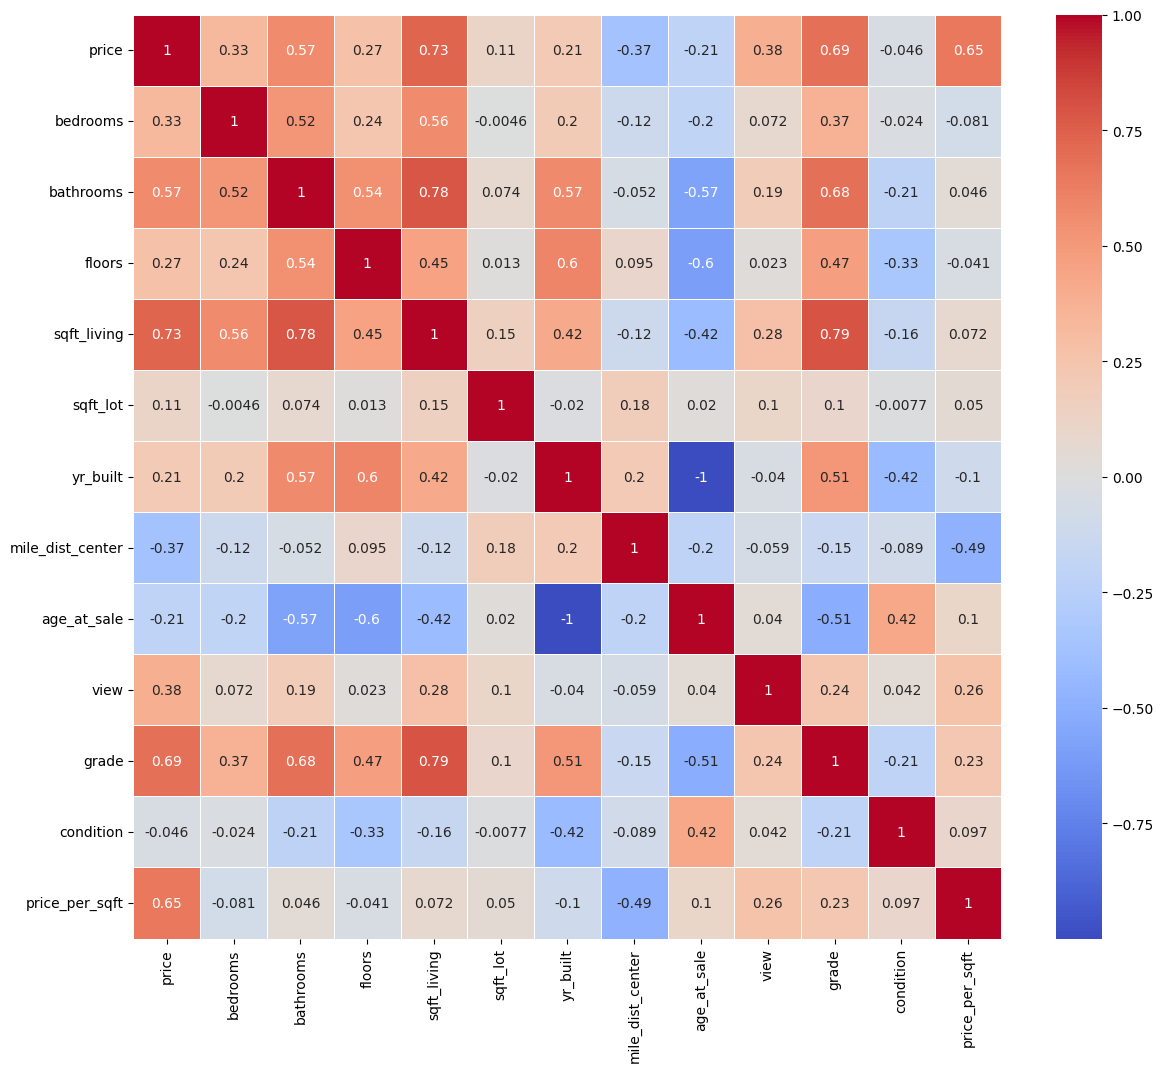

In [54]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx_countryside, linewidths=.5, annot=True, cmap='coolwarm')

#### **Correlation Matrix Analysis for Countryside Houses**

This correlation matrix offers insights into how various features of houses in the countryside relate to one another and influence the overall price. Below are the key observations:

##### Price Relationships:
1. **Price vs. Square Footage of Living Space (0.729):**
    - **Insight:** The strong positive correlation indicates that larger homes with more living space tend to have higher prices. This is the most significant relationship, reflecting the importance of living space in determining property value in rural areas where land is more abundant.

2. **Price vs. Grade (0.686):**
    - **Insight:** The correlation between price and grade is strong, suggesting that higher-grade properties, which likely have better construction quality and design, command higher prices. This relationship is crucial in rural settings where quality may be a differentiating factor among properties.

3. **Price vs. Bathrooms (0.570):**
    - **Insight:** The moderate positive correlation between price and the number of bathrooms suggests that more bathrooms generally add to the value of a home. This is particularly relevant in larger rural homes where additional bathrooms can significantly enhance comfort.

4. **Price vs. View (0.385):**
    - **Insight:** A moderate positive correlation indicates that properties with better views are valued higher. In rural areas, scenic views of natural landscapes can substantially increase property prices, making view an important factor.

5. **Price vs. Bedrooms (0.327):**
    - **Insight:** The correlation between price and the number of bedrooms is relatively weak compared to other factors, suggesting that while more bedrooms can increase a property's value, they are less influential than living space or grade. This could indicate that rural buyers prioritize overall space and quality over the number of rooms.

6. **Price vs. Distance from City Center (-0.373):**
    - **Insight:** The negative correlation suggests that homes closer to the city center tend to be more expensive, even in rural areas. This reflects the continuing influence of proximity to urban amenities on property values.

7. **Price vs. Price per Square Foot (0.652):**
    - **Insight:** The strong positive correlation between price and price per square foot indicates that as the overall price increases, the price per square foot also rises. This suggests that more expensive properties in the countryside command higher values per unit of living space, possibly due to better quality or location.

#### Other Key Relationships:
1. **Bathrooms vs. Square Footage of Living Space (0.783):**
    - **Insight:** The strong positive correlation between bathrooms and living space indicates that larger homes typically have more bathrooms, which is expected in rural properties designed for greater comfort and luxury.

2. **Grade vs. Square Footage of Living Space (0.791):**
    - **Insight:** The very strong correlation between grade and square footage of living space indicates that higher-grade homes are generally larger. This reinforces the idea that more prestigious homes in the countryside are not only better constructed but also more spacious.

3. **Year Built vs. Number of Floors (0.601):**
    - **Insight:** The positive correlation suggests that newer rural homes are more likely to have multiple floors, a design choice that maximizes living space even in areas where land is more abundant.

4. **Bathrooms vs. Year Built (0.574):**
    - **Insight:** Newer homes in the countryside tend to have more bathrooms, reflecting modern housing trends that emphasize comfort and convenience.

5. **Bedrooms vs. Square Footage of Living Space (0.564):**
    - **Insight:** This moderate correlation suggests that homes with more bedrooms tend to be larger, but this relationship is weaker than that of bathrooms, possibly due to variations in room sizes and layouts.

6. **Distance from City Center vs. Price per Square Foot (-0.485):**
    - **Insight:** The negative correlation between price per square foot and distance from the city center indicates that properties closer to the city center are valued more per square foot, even in rural settings. This suggests that proximity to urban areas still carries a premium.

7. **Age at Sale vs. Number of Floors (-0.601):**
    - **Insight:** Older homes tend to have fewer floors, likely reflecting historical building styles that favored single-story designs, which were more common in the past.

8. **Condition vs. Year Built (-0.424):**
    - **Insight:** The negative correlation suggests that older homes in the countryside tend to be in poorer condition, as expected due to wear and tear over time.

### Conclusion

The correlation matrix for countryside houses highlights the factors that influence property prices in a rural setting. Key relationships, such as those between price and living space, grade, and bathrooms, emphasize the importance of space and quality in determining property value. The analysis also reveals the ongoing influence of proximity to the city center, even in rural areas, where properties closer to urban amenities are more valuable. Understanding these relationships is crucial for making informed decisions in rural real estate markets, where space, quality, and location play pivotal roles in determining value.

## Comparative Analysis: City vs. Countryside Houses

- **Similarities:**
  - Both city and countryside houses show strong correlations between price and square footage of living space, grade, and bathrooms, indicating that these features are critical determinants of property value in both settings.
  - A good view enhances property value in both urban and rural areas, though slightly more in the city.

- **Differences:**
  - Proximity to the city center has a stronger influence on property prices in the countryside, reflecting the premium placed on accessibility to urban amenities in rural settings.
  - The price per square foot is more strongly correlated with overall price in the countryside, suggesting that more expensive rural properties are often of higher quality or better located, contributing to higher per-unit values.
  - Bathrooms and living space are more closely related in rural homes, indicating that larger rural properties tend to include more bathrooms, possibly reflecting the trend of building larger, more luxurious homes in these areas.

These insights provide a nuanced understanding of the real estate market dynamics in urban versus rural settings. While some factors like space, grade, and bathrooms are universally important, the significance of location and design varies between city and countryside, influencing property values differently depending on the context. Understanding these patterns can help in making informed decisions in real estate development, investment, and market analysis across different geographical settings.

## Summary

In this Exploratory Data Analysis (EDA) notebook, we conducted a comprehensive examination of the King County housing dataset, focusing on both city and countryside properties. Through correlation analysis, we identified key factors that influence property prices in different settings. 

- **Key Findings:**  
  - **City Houses:** Price is strongly influenced by living space, grade, and proximity to the city center, with quality and location playing crucial roles in determining value.
  - **Countryside Houses:** Larger homes with more bathrooms and higher grades are highly valued, with proximity to urban areas still significantly impacting prices.

These analyses have provided valuable insights into the distinct real estate dynamics in urban versus rural settings, offering a deeper understanding of the factors that drive property values.

## Closing

This EDA has laid a solid foundation for further analysis, guiding the next steps in hypothesis testing for our client. The insights gained here will inform more targeted and effective strategies in real estate development, investment, and pricing decisions as we continue to explore and analyze the King County housing market.